In [1]:
import pandas as pd
import numpy as np
import uuid
from collections import Counter
import math
from progressbar import ProgressBar, AdaptiveETA, Percentage, Bar, RotatingMarker

In [2]:
df = pd.read_hdf('../data/processed/recipe_vectors.h5')

In [8]:
df.describe()

,AP flour,Aioli,Aleppo chili,Aleppo chili flake,Aleppo pepper,Allspice Dram,Amaretto,Amaretto liqueur,Amarillo Chili Paste,Amaro Montenegro,...,zucchini,zucchini blossom,zucchini flower,zucchini squash,avg_rating,best_rating,worst_rating,prepare_again_rating,num_reviews,total_time
count,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,...,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.0,48817.000000,48817.000000,48817.000000
mean,0.033707,0.004846,0.000480,0.000278,0.006576,0.000480,0.007258,0.005452,0.000808,0.007750,...,3.116827,0.007151,0.009660,0.033450,2.187537,2.939714,0.0,0.559750,14.201733,16.883217
std,4.499754,1.070797,0.090788,0.032037,0.339461,0.074387,0.600907,0.851805,0.104633,1.123306,...,47.047255,0.819695,2.053853,5.213307,1.600183,1.765503,0.0,0.425841,31.805579,105.057369
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.0,0.780000,4.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.500000,4.000000,0.0,0.930000,15.000000,0.000000
max,887.205000,236.588000,19.715680,4.928920,44.360300,14.786800,85.048500,177.441000,14.786800,236.588000,...,2041.164000,170.097000,453.592000,907.184000,4.000000,4.000000,0.0,1.000000,1597.000000,4440.000000


In [31]:
df.head()

,AP flour,Aioli,Aleppo chili,Aleppo chili flake,Aleppo pepper,Allspice Dram,Amaretto,Amaretto liqueur,Amarillo Chili Paste,Amaro Montenegro,...,zucchini flower,zucchini squash,avg_rating,best_rating,worst_rating,prepare_again_rating,num_reviews,total_time,tags,title
http://www.epicurious.com/recipes/food/views/-adult-pimiento-cheese-100852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.5,4.0,0.0,0.85,25.0,0,"[Cheese, Vegetable, No-Cook, Vegetarian, Quick...","""Adult"" Pimiento Cheese"
http://www.epicurious.com/recipes/food/views/-an-apple-a-day-51133430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.5,4.0,0.0,0.67,3.0,0,"[Ginger, Dessert, Bake, Apple, Almond, Fall, R...","""An Apple a Day"""
http://www.epicurious.com/recipes/food/views/-blanketed-eggplant-305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,4.0,0.0,0.75,4.0,0,"[Tomato, Vegetable, Appetizer, Side, Vegetaria...","""Blanketed"" Eggplant"
http://www.epicurious.com/recipes/food/views/-bloody-mary-tomato-toast-with-celery-and-horseradish-56389813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,4.0,0.0,1.00,2.0,0,"[Condiment/Spread, Tomato, Appetizer, Kid-Frie...","""Bloody Mary"" Tomato Toast with Celery and Hor..."
http://www.epicurious.com/recipes/food/views/-bow-tie-pasta-with-zucchini-101932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.5,4.0,0.0,0.93,48.0,0,"[Pasta, Vegetarian, Quick & Easy, Dinner, Basi...","""Bow-Tie"" Pasta with Zucchini"


In [3]:
dat = df.values[:,:-8]

In [4]:
columns = list(df)
new_vec = []
for recipe in dat:
    ind = uuid.uuid4().hex
    for i in range(len(recipe)):
        if recipe[i] != 0:
            new_vec.append([ind, columns[i]])

In [5]:
print(len(dat))
basketized = pd.DataFrame(new_vec, columns=["index", "name"]).set_index('index', drop=False)
del basketized["index"]
basketized.head()

48817


,name
index,
39e189c457ad47cc8bf45445e9929009,garlic
39e189c457ad47cc8bf45445e9929009,mayonnaise
39e189c457ad47cc8bf45445e9929009,pimiento
39e189c457ad47cc8bf45445e9929009,sharp Cheddar
21c87e0792554dd59a89b043d6980a4d,almond


In [6]:
def generate_candidate_set(size, L):
    candidate_set = set()
    for i in range(len(L)):
        for j in range(i+1, len(L)):
            diff = L[i].difference(L[j])
            if len(diff) == 1:
                candidate_set.add(frozenset.union(L[i], L[j]))
    return candidate_set

def apriori(frame, support_per):
    candidate_sets = []
    frequent_sets = []
    thresh = math.floor(len(frame.groupby(level=0))*support_per)
    
    C1 = Counter()
    for ind, basket in frame.groupby(level=0):
        for item in basket.values:
            C1[item[0]] += 1
    
    L1 = []
    for item in C1.most_common():
        if item[1] > thresh:
            L1.append(set([item[0]]))
    print(L1)
    
    count = Counter()
    candidate = generate_candidate_set(2, L1)
    frequent = []
    size = 2
    while len(candidate) != 0:
        widgets = ['Counting C{}: '.format(size), Percentage(), ' ', Bar(marker=RotatingMarker()), ' ', AdaptiveETA()]
        pbar = ProgressBar(widgets=widgets)
        for ind, basket in pbar(frame.groupby(level=0)):
            for c in candidate:
                if basket["name"].isin(c).sum() == len(c):
                    count[c] += 1
        for item in count.most_common():
            if item[1] > thresh:
                frequent.append(set([item[0]]))
        candidate_sets.append(candidate)
        frequent_sets.append(frequent)
        size += 1
        count = Counter()
        candidate = generate_candidate_set(size, frequent)
        frequent = []
        
    return candidate_sets, frequent_sets

def apriori_quick(frame, vec_frame, support_per):
    candidate_sets = []
    frequent_sets = []
    thresh = math.floor(len(frame.groupby(level=0))*support_per)
    ing_map = {}
    dat = vec_frame.values
    columns = list(vec_frame)
    for i in range(len(columns)-8):
        ing_map[columns[i]] = i
    
    C1 = Counter()
    for ind, basket in frame.groupby(level=0):
        for item in basket.values:
            C1[item[0]] += 1
    
    L1 = []
    for item in C1.most_common():
        if item[1] > thresh:
            L1.append(frozenset([item[0]]))
    print(L1)
    
    count = Counter()
    candidate = generate_candidate_set(2, L1)
    frequent = []
    size = 2
    while len(candidate) != 0:
        widgets = ['Counting C{}: '.format(size), Percentage(), ' ', Bar(marker=RotatingMarker()), ' ', AdaptiveETA()]
        pbar = ProgressBar(widgets=widgets)
        for c in pbar(candidate):
            check_vec = []
            for ing in c:
                check_vec.append(ing_map[ing])
            for recipe in dat:
                if np.count_nonzero(recipe[check_vec]) == len(check_vec):
                    count[c] += 1
        for item in count.most_common():
            if item[1] > thresh:
                frequent.append(item[0])
        candidate_sets.append(candidate)
        frequent_sets.append(frequent)
        size += 1
        count = Counter()
        candidate = generate_candidate_set(size, frequent)
        frequent = []
        
    return candidate_sets, frequent_sets

In [7]:
c_sets, f_sets = apriori_quick(basketized, df, 0.01)

[frozenset({'sugar'}), frozenset({'garlic'}), frozenset({'egg'}), frozenset({'onion'}), frozenset({'salt'}), frozenset({'unsalted butter'}), frozenset({'olive oil'}), frozenset({'water'}), frozenset({'all purpose flour'}), frozenset({'lemon juice'}), frozenset({'extra virgin olive oil'}), frozenset({'kosher salt'}), frozenset({'black pepper'}), frozenset({'parsley'}), frozenset({'vegetable oil'}), frozenset({'milk'}), frozenset({'butter'}), frozenset({'vanilla extract'}), frozenset({'tomato'}), frozenset({'thyme'}), frozenset({'ginger'}), frozenset({'cinnamon'}), frozenset({'shallot'}), frozenset({'baking powder'}), frozenset({'heavy cream'}), frozenset({'carrot'}), frozenset({'chicken broth'}), frozenset({'lime juice'}), frozenset({'scallion'}), frozenset({'basil'}), frozenset({'baking soda'}), frozenset({'soy sauce'}), frozenset({'cilantro'}), frozenset({'honey'}), frozenset({'cumin'}), frozenset({'bay'}), frozenset({'dry white wine'}), frozenset({'Dijon mustard'}), frozenset({'orega

Counting C2: 100% ||||||||||||||||||||||||||||||||||||||||||||||| Time: 0:17:35
Counting C3: 100% ||||||||||||||||||||||||||||||||||||||||||||||| Time: 0:08:30
Counting C4: 100% ||||||||||||||||||||||||||||||||||||||||||||||| Time: 0:02:10
Counting C5: 100% ||||||||||||||||||||||||||||||||||||||||||||||| Time: 0:00:29
Counting C6: 100% ||||||||||||||||||||||||||||||||||||||||||||||| Time: 0:00:07
Counting C7: 100% ||||||||||||||||||||||||||||||||||||||||||||||| Time: 0:00:00


In [9]:
for f in f_sets:
    print(f)

[frozenset({'egg', 'sugar'}), frozenset({'garlic', 'onion'}), frozenset({'unsalted butter', 'egg'}), frozenset({'salt', 'egg'}), frozenset({'unsalted butter', 'sugar'}), frozenset({'all purpose flour', 'egg'}), frozenset({'salt', 'sugar'}), frozenset({'unsalted butter', 'all purpose flour'}), frozenset({'garlic', 'olive oil'}), frozenset({'salt', 'unsalted butter'}), frozenset({'salt', 'all purpose flour'}), frozenset({'all purpose flour', 'sugar'}), frozenset({'olive oil', 'onion'}), frozenset({'water', 'sugar'}), frozenset({'salt', 'water'}), frozenset({'sugar', 'vanilla extract'}), frozenset({'egg', 'vanilla extract'}), frozenset({'garlic', 'extra virgin olive oil'}), frozenset({'egg', 'milk'}), frozenset({'baking powder', 'egg'}), frozenset({'garlic', 'salt'}), frozenset({'salt', 'black pepper'}), frozenset({'unsalted butter', 'vanilla extract'}), frozenset({'salt', 'onion'}), frozenset({'garlic', 'parsley'}), frozenset({'all purpose flour', 'baking powder'}), frozenset({'garlic', 

In [10]:
dfs = []
for f in f_sets:
    freq_vec = []
    for s in f:
        insert = list(s)
        insert.sort()
        freq_vec.append(insert)
    new_df = pd.DataFrame(freq_vec, columns=["Item {}".format(x) for x in range(1, len(insert) + 1)])
    dfs.append(new_df)

In [11]:
dfs[0].head(10)

,Item 1,Item 2
0,egg,sugar
1,garlic,onion
2,egg,unsalted butter
3,egg,salt
4,sugar,unsalted butter
5,all purpose flour,egg
6,salt,sugar
7,all purpose flour,unsalted butter
8,garlic,olive oil
9,salt,unsalted butter


In [12]:
dfs[1].head(10)

,Item 1,Item 2,Item 3
0,egg,sugar,unsalted butter
1,all purpose flour,egg,unsalted butter
2,all purpose flour,egg,sugar
3,egg,salt,sugar
4,all purpose flour,sugar,unsalted butter
5,all purpose flour,egg,salt
6,egg,salt,unsalted butter
7,all purpose flour,salt,unsalted butter
8,all purpose flour,salt,sugar
9,salt,sugar,unsalted butter


In [13]:
dfs[2].head(10)

,Item 1,Item 2,Item 3,Item 4
0,all purpose flour,egg,sugar,unsalted butter
1,all purpose flour,egg,salt,unsalted butter
2,all purpose flour,egg,salt,sugar
3,egg,salt,sugar,unsalted butter
4,all purpose flour,salt,sugar,unsalted butter
5,egg,sugar,unsalted butter,vanilla extract
6,all purpose flour,baking powder,egg,sugar
7,all purpose flour,baking powder,egg,unsalted butter
8,all purpose flour,egg,unsalted butter,vanilla extract
9,all purpose flour,egg,sugar,vanilla extract


In [14]:
dfs[3].head(10)

,Item 1,Item 2,Item 3,Item 4,Item 5
0,all purpose flour,egg,salt,sugar,unsalted butter
1,all purpose flour,egg,sugar,unsalted butter,vanilla extract
2,all purpose flour,baking powder,egg,sugar,unsalted butter
3,all purpose flour,baking powder,egg,salt,sugar
4,all purpose flour,baking powder,egg,salt,unsalted butter
5,egg,salt,sugar,unsalted butter,vanilla extract
6,baking powder,egg,salt,sugar,unsalted butter
7,all purpose flour,egg,salt,unsalted butter,vanilla extract
8,all purpose flour,egg,salt,sugar,vanilla extract
9,all purpose flour,baking powder,salt,sugar,unsalted butter


In [15]:
dfs[4].head(10)

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6
0,all purpose flour,baking powder,egg,salt,sugar,unsalted butter
1,all purpose flour,egg,salt,sugar,unsalted butter,vanilla extract
2,all purpose flour,baking powder,egg,sugar,unsalted butter,vanilla extract
3,all purpose flour,baking soda,egg,salt,sugar,unsalted butter


In [16]:
def conf_calc(df_in, I, j):
    I_df = df_in[I]
    ij = np.append(I, j)
    Ij_df = df_in[ij]
    I_dat = I_df.values
    Ij_dat = Ij_df.values
    I_sup = 0
    Ij_sup = 0
    for recipe in I_dat:
        if np.count_nonzero(recipe) == len(I):
            I_sup += 1
    for recipe in Ij_dat:
        if np.count_nonzero(recipe) == len(I)+1:
            Ij_sup += 1
    return Ij_sup/I_sup

In [17]:
def interest_calc(df_in, j, conf):
    denom = len(df_in)
    num = 0
    df_j = df_in[j]
    dat_j = df_j.values
    for recipe in dat_j:
        if recipe > 0:
            num += 1
    pj = num/denom
    return conf-pj

In [18]:
def assoc_rules(df_in, df_calc):
    rules = []
    for basket in df_calc.values:
        for i in range(len(basket)):
            I = basket[:]
            j = I[i]
            I = np.delete(I, i)
            conf = conf_calc(df_in, I, j)
            inter = interest_calc(df_in, j, conf)
            rule = I
            rule = np.append(rule, j)
            rule = np.append(rule, conf)
            rule = np.append(rule, inter)
            rules.append(rule)
    columns = ["I[{}]".format(x) for x in range(len(df_calc.values[0])-1)]
    columns.append("j")
    columns.append("Confidence")
    columns.append("Interest")
    return pd.DataFrame(rules, columns=columns)

In [19]:
six_rules = assoc_rules(df, dfs[4])
six_rules = six_rules.sort_values('Confidence', ascending=False)

In [20]:
six_rules.head()

,I[0],I[1],I[2],I[3],I[4],j,Confidence,Interest
14,all purpose flour,baking powder,sugar,unsalted butter,vanilla extract,egg,0.933216,0.691845
20,all purpose flour,baking soda,salt,sugar,unsalted butter,egg,0.900735,0.659364
7,all purpose flour,salt,sugar,unsalted butter,vanilla extract,egg,0.866180,0.624809
2,all purpose flour,baking powder,salt,sugar,unsalted butter,egg,0.861397,0.620027
0,baking powder,egg,salt,sugar,unsalted butter,all purpose flour,0.817391,0.661401


In [21]:
six_rules.describe()

,Confidence,Interest
count,24.000000,24.000000
mean,0.713226,0.521923
std,0.163309,0.112952
min,0.298598,0.254311
25%,0.690479,0.447676
50%,0.768183,0.516741
75%,0.812027,0.621222
max,0.933216,0.691845


In [22]:
five_rules = assoc_rules(df, dfs[3])
five_rules = five_rules.sort_values('Confidence', ascending=False)

In [23]:
five_rules.head()

,I[0],I[1],I[2],I[3],j,Confidence,Interest
106,baking powder,salt,unsalted butter,vanilla extract,egg,0.936995,0.695624
81,baking powder,sugar,unsalted butter,vanilla extract,egg,0.934081,0.692711
112,all purpose flour,baking powder,salt,vanilla extract,egg,0.933116,0.691745
96,baking powder,salt,sugar,vanilla extract,egg,0.932390,0.691019
72,all purpose flour,baking powder,unsalted butter,vanilla extract,egg,0.932039,0.690668


In [24]:
five_rules.describe()

,Confidence,Interest
count,180.000000,180.000000
mean,0.673983,0.489584
std,0.181249,0.128880
min,0.225031,0.066069
25%,0.567078,0.431810
50%,0.724765,0.492500
75%,0.797716,0.596413
max,0.936995,0.695624


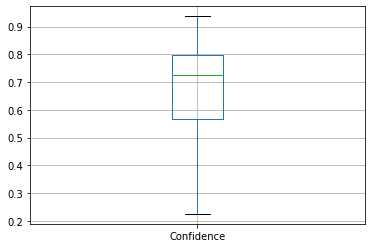

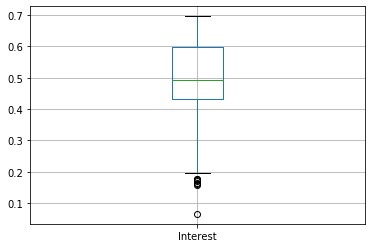

In [35]:
import matplotlib.pyplot as plt
five_rules.boxplot('Confidence')
plt.show()
five_rules.boxplot('Interest')
plt.show()